# SMEARLY PROJECT

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
data_resized_dir= "../raw_data/resized_data/"

url_y_train = "../raw_data/isbi2025-ps3c-train-dataset.csv"
url_y_test = "../raw_data/isbi2025-ps3c-test-dataset.csv"

y_test_df = pd.read_csv(url_y_test)
y_train_df = pd.read_csv(url_y_train)

In [3]:
y_test_df.head()

,image_name
0,isbi2025_ps3c_test_image_04577.png
1,isbi2025_ps3c_test_image_08558.png
2,isbi2025_ps3c_test_image_02443.png
3,isbi2025_ps3c_test_image_12392.png
4,isbi2025_ps3c_test_image_13368.png


In [4]:
y_train_df.head()

,image_name,label
0,isbi2025_ps3c_train_image_73838.png,rubbish
1,isbi2025_ps3c_train_image_84057.png,unhealthy
2,isbi2025_ps3c_train_image_80712.png,rubbish
3,isbi2025_ps3c_train_image_08602.png,healthy
4,isbi2025_ps3c_train_image_31517.png,healthy


In [5]:
y_train_df['label'].value_counts()

label
rubbish      50371
healthy      28895
bothcells     3448
unhealthy     2366
Name: count, dtype: int64

In [6]:
y_train_df_2 = y_train_df.copy()

In [11]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img = load_img(f"{data_resized_dir}healthy/isbi2025_ps3c_train_image_08587.png")
img
X = img_to_array(img)
X

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

(224, 224, 3)


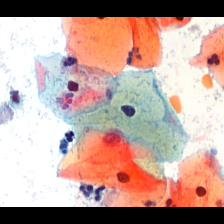

In [12]:
print(X.shape)
img

In [15]:
img_healthy_train = os.listdir(f"{data_resized_dir}/healthy")[:15]
img_healthy_test = os.listdir(f"{data_resized_dir}/healthy")[15:]

img_rubbish_train = os.listdir(f"{data_resized_dir}/rubbish")[:15]
img_rubbish_test = os.listdir(f"{data_resized_dir}/rubbish")[15:]

img_unhealthy_train = os.listdir(f"{data_resized_dir}/unhealthy")[:15]
img_unhealthy_test = os.listdir(f"{data_resized_dir}/unhealthy")[15:]

img_train = img_healthy_train + img_rubbish_train + img_unhealthy_train
img_test = img_healthy_test + img_rubbish_test + img_unhealthy_test


In [16]:
len(img_train)

45

In [18]:
X_train = []
for j in ["healthy", "rubbish", "unhealthy"]:
    for dir in img_train: 
        if dir in os.listdir(f"{data_resized_dir}/{j}"):
            X_train.append(img_to_array(load_img(f"{data_resized_dir}/{j}/{dir}")))
        
X_train

[array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]], dtype=float32),
 array([[[0., 0., 0.],
         [0., 0.,

In [19]:
X_train = np.array(X_train)
X_train.shape

(45, 224, 224, 3)

In [20]:
X_train[0,0]

array([[  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [127., 178., 216.],
       [151., 190., 218.],
       [183., 209., 226.],
       [200., 217., 227.],
       [206., 219., 228.],
       [222., 231., 241.],
       [230., 234., 244.],
       [241., 238., 247.],
       [252., 246., 252.],
       [253., 252., 255.],
       [254., 254., 255.],
       [255., 255., 255.],
       [254., 254., 253.],
       [254., 254., 252.],
       [254., 254., 254.],
       [253., 253., 255.],
       [251., 250., 255.],
       [252., 251., 255.],
       [246., 241., 248.],
       [250., 241., 250.],
       [248., 239., 247.],
       [252., 244., 251.],
       [255., 250., 255.],
       [254., 248., 254.],
       [254., 250., 254.],
       [254., 250., 254.],
       [255., 253., 255.],
       [254., 252., 254.],
       [254., 253., 255.],
       [252., 250., 253.],
       [253., 251., 254.],
 

In [21]:
y_train_healthy = np.full((15,1),0) 
y_train_rubbish = np.full((15,1),1)
y_train_unhealthy = np.full((15,1),2)
y_train = np.concatenate([y_train_healthy, y_train_rubbish, y_train_unhealthy])
y_train


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2]])

In [23]:
X_test = []
for j in ["healthy", "rubbish", "unhealthy"]:
    for dir in img_test: 
        if dir in os.listdir(f"{data_resized_dir}/{j}"):
            X_test.append(img_to_array(load_img(f"{data_resized_dir}/{j}/{dir}")))
X_test = np.array(X_test)
X_test.shape

(30, 224, 224, 3)

In [24]:
y_train_healthy = np.full((15,1),0) 
y_train_rubbish = np.full((15,1),1)
y_train_unhealthy = np.full((15,1),2)
y_train = np.concatenate([y_train_healthy, y_train_rubbish, y_train_unhealthy])
y_train

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2]])

In [25]:
y_train.shape

(45, 1)

In [26]:
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train)
y_cat_train.shape, y_cat_train

((45, 3),
 array([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]])

In [27]:
y_test_healthy = np.full((10,1),0) 
y_test_rubbish = np.full((10,1),1)
y_test_unhealthy = np.full((10,1),2)
y_test = np.concatenate([y_test_healthy, y_test_rubbish, y_test_unhealthy])
y_test

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2]])

In [28]:
y_cat_test = to_categorical(y_test)
y_cat_test.shape, y_cat_test

((30, 3),
 array([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]]))

In [29]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, optimizers, callbacks

In [31]:
model_1 = Sequential()

model_1.add(layers.Input((224, 224, 3)))
model_1.add(layers.Rescaling(1./255))

model_1.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", padding="same"))
model_1.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )


model_1.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", padding="same"))
model_1.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )


model_1.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation="relu", padding="same"))
model_1.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )

model_1.add(layers.Conv2D(filters = 128, kernel_size = (3,3), activation="relu", padding="same"))
model_1.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )

model_1.add(layers.Flatten())

# Here we flatten our data to end up with just one dimension

model_1.add(layers.Dense(64, activation="relu"))

model_1.add(layers.Dropout(0.5))

model_1.add(layers.Dense(3, activation="softmax"))


model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,708,387 (6.52 MB)

 Trainable params: 1,708,387 (6.52 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
adam = optimizers.Adam(learning_rate = 0.001)
model_1.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['f1_score'])

In [33]:
batch_size = 1

In [34]:
history_1 = model_1.fit(X_train, y_cat_train, batch_size=batch_size, epochs=10, validation_split=0.2)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - f1_score: 0.1199 - loss: 1.4058 - val_f1_score: 0.0000e+00 - val_loss: 1.4920
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - f1_score: 0.3345 - loss: 1.0612 - val_f1_score: 0.0000e+00 - val_loss: 1.2948
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - f1_score: 0.1963 - loss: 1.0753 - val_f1_score: 0.0000e+00 - val_loss: 1.3589
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - f1_score: 0.2136 - loss: 1.0698 - val_f1_score: 0.0000e+00 - val_loss: 1.3216
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - f1_score: 0.3541 - loss: 1.1060 - val_f1_score: 0.0000e+00 - val_loss: 1.2279
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - f1_score: 0.3458 - loss: 1.0825 - val_f1_score: 0.0000e+00 - val_loss: 1.5907
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - f1_score: 0.4140 - loss: 1.0137 - val_f1_score: 0.0000e+00 - val_loss: 3.1803
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - f1_score: 0.2747 - lo

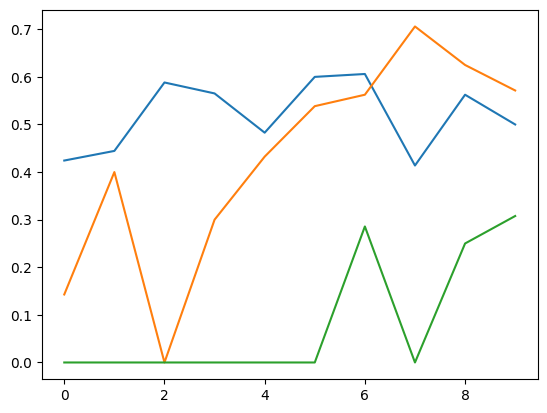

In [36]:
plt.plot(history_1.history['f1_score']);

In [37]:
results = pd.DataFrame(model_1.predict(X_test))
results[[0,1,2]] = results[[0,1,2]].apply(lambda x: round(x,2))
results["y_predict"] = results.idxmax(axis=1)
results["y_cat_test"] = y_test
results

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


,0,1,2,y_predict,y_cat_test
0,0.37,0.39,0.23,1,0
1,0.37,0.39,0.24,1,0
2,1.00,0.00,0.00,0,0
3,0.58,0.38,0.04,0,0
4,1.00,0.00,0.00,0,0
5,1.00,0.00,0.00,0,0
6,0.61,0.31,0.07,0,0
7,0.38,0.39,0.23,1,0
8,0.05,0.89,0.06,1,0
9,0.73,0.01,0.26,0,0


In [38]:
MODEL = "model_1b.h5"

modelCheckpoint = callbacks.ModelCheckpoint(MODEL,
                                            monitor="val_loss",
                                            verbose=0,
                                            save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss",
                                        factor=0.1,
                                        patience=3,
                                        verbose=1,
                                        min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss',
                                       patience=10,
                                       verbose=0,
                                       restore_best_weights=True)

In [39]:
history_1b = model_1.fit(X_train, y_cat_train, batch_size=batch_size, epochs=10, validation_split=0.2, callbacks=[modelCheckpoint, LRreducer, EarlyStopper])

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - f1_score: 0.5190 - loss: 0.9039

36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 178ms/step - f1_score: 0.5213 - loss: 0.9031 - val_f1_score: 0.0000e+00 - val_loss: 5.2525 - learning_rate: 0.0010
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - f1_score: 0.4167 - loss: 0.8548

36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 197ms/step - f1_score: 0.4185 - loss: 0.8552 - val_f1_score: 0.0667 - val_loss: 3.7801 - learning_rate: 0.0010
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 182ms/step - f1_score: 0.5868 - loss: 0.6743 - val_f1_score: 0.0000e+00 - val_loss: 7.2257 - learning_rate: 0.0010
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 157ms/step - f1_score: 0.6095 - loss: 0.5368 - val_f1_score: 0.0667 - val_loss: 9.2015 - learning_rate: 0.0010
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - f1_score: 0.5529 - loss: 0.5744
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - f1_score: 0.5581 - loss: 0.5734 - val_f1_score: 0.0000e+00 - val_loss: 10.1225 - learning_rate: 0.0010
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - f1_score: 0.8037 - loss: 0.4996 - val_f1_score: 0.0000e+00 - val_loss: 10.7205 - learning_rate: 1.0000e-04
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - f1_score: 0.8600 - loss: 0.

In [40]:
history_1b.history['f1_score']

[<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.64285713, 0.76470584, 0.39999995], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.5333333 , 0.6285714 , 0.28571427], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.6896552 , 0.77777773, 0.28571427], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.76470584, 0.78571427, 0.59999996], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.74999994, 0.7586206 , 0.7272727 ], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.89655167, 0.93749994, 0.9090909 ], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.8275862 , 0.87499994, 0.7272727 ], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.96551716, 0.9333333 , 0.92307687], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.9285714 , 0.96774185, 0.92307687], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float3

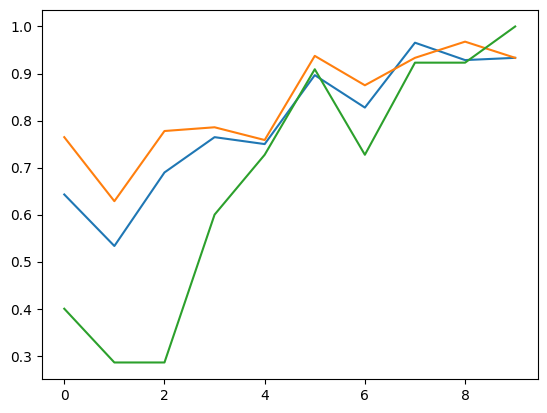

In [42]:
plt.plot(history_1b.history['f1_score']);

In [75]:
modelft_results = pd.DataFrame(model_1.predict(X_test))
modelft_results[[0,1,2]] = modelft_results[[0,1,2]].apply(lambda x: round(x,2))
modelft_results["y_predict"] = modelft_results.idxmax(axis=1)
modelft_results["y_cat_test"] = y_test
modelft_results

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


,0,1,2,y_predict,y_cat_test
0,0.32,0.47,0.21,1,0
1,0.36,0.48,0.16,1,0
2,0.99,0.01,0.01,0,0
3,0.40,0.49,0.11,1,0
4,1.00,0.00,0.00,0,0
5,1.00,0.00,0.00,0,0
6,0.45,0.47,0.08,1,0
7,0.34,0.51,0.15,1,0
8,0.00,1.00,0.00,1,0
9,0.44,0.23,0.33,0,0


In [45]:
model_1.evaluate(X_test, y_cat_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - f1_score: 0.3778 - loss: 1.7562


[1.75624418258667,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.39999998, 0.5517241 , 0.18181816], dtype=float32)>]

In [46]:
from tensorflow.keras.applications import EfficientNetB0

IMG_SIZE = 224
BATCH_SIZE = 1


base_model = EfficientNetB0(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights="imagenet")
base_model.trainable = False
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(64, activation='relu')(x)
prediction = layers.Dense(3, activation='softmax')(x)


ENB0_model = Model(inputs=base_model.input, outputs=prediction)

ENB0_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['f1_score'])
ENB0_model.summary()


Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 224, 224,  │          0 │ input_layer_2[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling_2[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_3[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,131,750 (15.76 MB)

 Trainable params: 82,179 (321.01 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [47]:
ENB0_history = ENB0_model.fit(X_train, y_cat_train, batch_size=1, epochs=10, validation_split=0.2)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 24s 218ms/step - f1_score: 0.3241 - loss: 1.1218 - val_f1_score: 0.0667 - val_loss: 2.1223
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - f1_score: 0.8205 - loss: 0.4406 - val_f1_score: 0.1212 - val_loss: 2.0011
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - f1_score: 0.8979 - loss: 0.2316 - val_f1_score: 0.1667 - val_loss: 2.3593
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - f1_score: 0.8859 - loss: 0.0914 - val_f1_score: 0.1667 - val_loss: 2.0983
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - f1_score: 0.9730 - loss: 0.0634 - val_f1_score: 0.1667 - val_loss: 2.7465
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - f1_score: 0.8919 - loss: 0.0531 - val_f1_score: 0.1667 - val_loss: 2.8534
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - f1_score: 0.9730 - loss: 0.0252 - val_f1_score: 0.1212 - val_loss: 3.1832
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - f1_score: 0.9279 - loss: 0.0221 - val_f1_score: 0

In [48]:
ENB0_results = pd.DataFrame(ENB0_model.predict(X_test))
ENB0_results[[0,1,2]] = ENB0_results[[0,1,2]].apply(lambda x: round(x,2))
ENB0_results["y_predict"] = ENB0_results.idxmax(axis=1)
ENB0_results["y_cat_test"] = y_test
ENB0_results

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


,0,1,2,y_predict,y_cat_test
0,0.23,0.74,0.03,1,0
1,0.26,0.01,0.73,2,0
2,0.84,0.07,0.08,0,0
3,0.93,0.04,0.02,0,0
4,0.67,0.24,0.08,0,0
5,0.76,0.01,0.23,0,0
6,0.00,1.00,0.00,1,0
7,0.99,0.00,0.00,0,0
8,0.86,0.13,0.00,0,0
9,0.94,0.01,0.05,0,0


In [49]:
ENB0_model.evaluate(X_test, y_cat_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - f1_score: 0.5547 - loss: 1.3225


[1.322515845298767,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.63636357, 0.71999997, 0.3076923 ], dtype=float32)>]

In [141]:
from smearly.ml_logic.model import initialize_cnn_model, compile_model, train_model, evaluate_model

model_cnn_1 = initialize_cnn_model((224, 224, 3))

✅ CNN Model initialized


In [99]:
model_cnn_1 = compile_model(model_cnn_1)

✅ Model compiled


In [109]:
X_train

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [101]:
model_cnn_1, history_cnn_nft = train_cnn_model(model_cnn_1, X_train, y_cat_train,fine_tuning=False)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - f1_score: 0.1667 - loss: 41.5437 - val_f1_score: 0.0000e+00 - val_loss: 836.0701
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - f1_score: 0.2174 - loss: 238.9010 - val_f1_score: 0.0000e+00 - val_loss: 404.2727
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - f1_score: 0.3935 - loss: 35.7752 - val_f1_score: 0.0000e+00 - val_loss: 255.9894
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - f1_score: 0.3114 - loss: 33.5946 - val_f1_score: 0.0000e+00 - val_loss: 154.4618
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - f1_score: 0.3276 - loss: 13.4103 - val_f1_score: 0.0000e+00 - val_loss: 105.2576
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - f1_score: 0.2804 - loss: 11.6572 - val_f1_score: 0.0000e+00 - val_loss: 60.4258
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - f1_score: 0.2913 - loss: 6.4267 - val_f1_score: 0.0000e+00 - val_loss: 32.9922
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - f1_score: 0.3498 - loss: 4.1819 - val_f1_sc

In [102]:
history_cnn_nft.history

{'f1_score': [<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.        , 0.49999994, 0.        ], dtype=float32)>,
  <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.6521738, 0.       , 0.       ], dtype=float32)>,
  <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.59999996, 0.5806451 , 0.        ], dtype=float32)>,
  <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.29999995, 0.6341463 , 0.        ], dtype=float32)>,
  <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.4666666, 0.516129 , 0.       ], dtype=float32)>,
  <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.6190476 , 0.22222221, 0.        ], dtype=float32)>,
  <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.5405405 , 0.33333328, 0.        ], dtype=float32)>,
  <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.5333333, 0.516129 , 0.       ], dtype=float32)>,
  <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.4166666 , 0.48275855, 0.        ], dtype=float32)>,
  <tf.Tensor: shape=(3,),

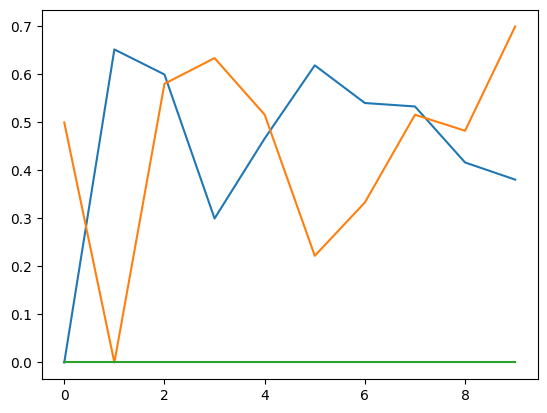

In [103]:
plt.plot(history_cnn_nft.history["f1_score"]);

In [104]:
model_cnn_1.evaluate(X_test, y_cat_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 762ms/step - f1_score: 0.2598 - loss: 8.7648


[8.764775276184082,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.5294117 , 0.24999994, 0.        ], dtype=float32)>]

In [108]:
evaluation = evaluate_model(model_cnn_1, X_test, y_cat_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step - f1_score: 0.2598 - loss: 8.7648
coucou
✅ Model evaluated on 30 images with global F1 score : 0.25999999046325684


In [106]:
evaluation[1]


<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.5294117 , 0.24999994, 0.        ], dtype=float32)>

In [107]:
round(np.mean(evaluation[1]),2)

0.26

In [110]:
model_cnn_2 = initialize_cnn_model((224, 224, 3))

✅ CNN Model initialized


In [111]:
model_cnn_2 = compile_model(model_cnn_2)

✅ Model compiled


In [113]:
model_cnn_2, history_cnn_ft = train_cnn_model(model_cnn_2, X_train, y_cat_train, fine_tuning=True)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - f1_score: 0.1228 - loss: 35.5972

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - f1_score: 0.1228 - loss: 35.5972 - val_f1_score: 0.0000e+00 - val_loss: 438.0309 - learning_rate: 0.0010
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - f1_score: 0.2174 - loss: 256.8327

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - f1_score: 0.2174 - loss: 256.8327 - val_f1_score: 0.0000e+00 - val_loss: 80.2801 - learning_rate: 0.0010
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - f1_score: 0.3988 - loss: 16.3900

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - f1_score: 0.3988 - loss: 16.3900 - val_f1_score: 0.0000e+00 - val_loss: 75.0190 - learning_rate: 0.0010
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - f1_score: 0.2222 - loss: 29.8445

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - f1_score: 0.2222 - loss: 29.8445 - val_f1_score: 0.0000e+00 - val_loss: 37.3575 - learning_rate: 0.0010
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - f1_score: 0.3426 - loss: 13.2527

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - f1_score: 0.3426 - loss: 13.2527 - val_f1_score: 0.0000e+00 - val_loss: 32.8109 - learning_rate: 0.0010
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - f1_score: 0.3061 - loss: 8.8018

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - f1_score: 0.3061 - loss: 8.8018 - val_f1_score: 0.0000e+00 - val_loss: 21.2913 - learning_rate: 0.0010
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - f1_score: 0.3610 - loss: 4.5101

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - f1_score: 0.3610 - loss: 4.5101 - val_f1_score: 0.0000e+00 - val_loss: 8.7173 - learning_rate: 0.0010
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - f1_score: 0.5025 - loss: 1.3708

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - f1_score: 0.5025 - loss: 1.3708 - val_f1_score: 0.0000e+00 - val_loss: 4.6094 - learning_rate: 0.0010
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - f1_score: 0.4467 - loss: 1.0583

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - f1_score: 0.4467 - loss: 1.0583 - val_f1_score: 0.0444 - val_loss: 2.5472 - learning_rate: 0.0010
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - f1_score: 0.3474 - loss: 1.2059

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - f1_score: 0.3474 - loss: 1.2059 - val_f1_score: 0.0444 - val_loss: 2.4358 - learning_rate: 0.0010
✅ Model trained on 45 images with max F1 score : à déterminer


In [114]:
model_cnn_2.evaluate(X_test, y_cat_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step - f1_score: 0.3866 - loss: 1.8821


[1.8821431398391724,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.4545454 , 0.53846145, 0.16666663], dtype=float32)>]

In [116]:
toto = evaluate_model(model_cnn_2, X_test, y_cat_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step - f1_score: 0.3866 - loss: 1.8821
✅ Model evaluated on 30 images with global F1 score : 0.38999998569488525


In [117]:
from smearly.ml_logic.model import initialize_enb0_model
model_enb0 = initialize_enb0_model((224, 224, 3))

✅ EfficientNetB0 model initialized


In [118]:
model_enb0 = compile_model(model_enb0)

✅ Model compiled


In [119]:
model_enb0 , history_enb0 = train_cnn_model(model_enb0, X_train, y_cat_train, fine_tuning=False)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step - f1_score: 0.1627 - loss: 1.3408 - val_f1_score: 0.0833 - val_loss: 1.2656
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - f1_score: 0.4419 - loss: 0.9261 - val_f1_score: 0.0000e+00 - val_loss: 1.6718
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - f1_score: 0.5675 - loss: 0.6828 - val_f1_score: 0.0000e+00 - val_loss: 2.0777
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - f1_score: 0.5904 - loss: 0.5638 - val_f1_score: 0.0000e+00 - val_loss: 2.4577
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - f1_score: 0.5685 - loss: 0.4840 - val_f1_score: 0.0000e+00 - val_loss: 2.8045
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - f1_score: 0.6126 - loss: 0.4120 - val_f1_score: 0.0000e+00 - val_loss: 3.1082
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - f1_score: 0.5685 - loss: 0.3562 - val_f1_score: 0.0000e+00 - val_loss: 3.3875
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - f1_score: 0.6559 - loss: 0.3192 - val_f1_score: 0.0000e+00 - val

In [120]:
evaluation_enb0 = evaluate_model(model_enb0, X_test, y_cat_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - f1_score: 0.4533 - loss: 1.6780
✅ Model evaluated on 30 images with global F1 score : 0.44999998807907104


In [121]:
model_enb0_ft , history_enb0_ft = train_cnn_model(model_enb0, X_train, y_cat_train, fine_tuning=True)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - f1_score: 0.6559 - loss: 0.2131

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - f1_score: 0.6559 - loss: 0.2131 - val_f1_score: 0.0000e+00 - val_loss: 4.0660 - learning_rate: 0.0010
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - f1_score: 0.6559 - loss: 0.2025 - val_f1_score: 0.0000e+00 - val_loss: 4.1360 - learning_rate: 0.0010
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - f1_score: 0.6559 - loss: 0.1623 - val_f1_score: 0.0000e+00 - val_loss: 4.1819 - learning_rate: 0.0010
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - f1_score: 0.6559 - loss: 0.1539
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - f1_score: 0.6559 - loss: 0.1539 - val_f1_score: 0.0000e+00 - val_loss: 4.2172 - learning_rate: 0.0010
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - f1_score: 0.6559 - loss: 0.1346 - val_f1_score: 0.0000e+00 - val_loss: 4.2194 - learning_rate: 1.0000e-04
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - f1_score: 0.6559 - loss: 0.1328 - val_f1_score: 0.0000e+

In [122]:
evaluate_model(model_enb0_ft, X_test, y_cat_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - f1_score: 0.4533 - loss: 1.7110
✅ Model evaluated on 30 images with global F1 score : 0.44999998807907104


[1.7109590768814087,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.64      , 0.71999997, 0.        ], dtype=float32)>]

In [123]:
model_cnn_3= initialize_cnn_model((224, 224, 3))

✅ CNN Model initialized


In [124]:
model_cnn_3 = compile_model(model_cnn_3)

✅ Model compiled


In [142]:
%reload_ext autoreload
model_cnn_3, history_3 = train_model(model_cnn_3, X_train, y_cat_train, batch_size=1)

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - f1_score: 0.5214 - loss: 1.8382 - val_f1_score: 0.0000e+00 - val_loss: 15.5413
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - f1_score: 0.4151 - loss: 2.2613 - val_f1_score: 0.0000e+00 - val_loss: 8.5566
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - f1_score: 0.5400 - loss: 0.6043 - val_f1_score: 0.0000e+00 - val_loss: 12.2942
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - f1_score: 0.5286 - loss: 0.5600 - val_f1_score: 0.0000e+00 - val_loss: 11.5089
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - f1_score: 0.4225 - loss: 0.8907 - val_f1_score: 0.0000e+00 - val_loss: 11.9286
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - f1_score: 0.4548 - loss: 0.6467 - val_f1_score: 0.0000e+00 - val_loss: 13.8602
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - f1_score: 0.4972 - loss: 0.4506 - val_f1_score: 0.0000e+00 - val_loss: 15.7878
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - f1_score: 0.4185

In [136]:
np.mean(history_3.history['f1_score'][9])

0.37132612

In [143]:
model_cnn_4_tensor = initialize_cnn_model((224, 224, 3))

✅ CNN Model initialized


In [144]:
model_cnn_4_tensor = compile_model(model_cnn_4_tensor)

✅ Model compiled


In [145]:
from smearly.ml_logic.model import train_model_2
model_cnn_4_tensor, history_4_tensor = train_model_2(model_cnn_4_tensor, (X_train, y_cat_train), batch_size=1, fine_tuning=False)    

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - f1_score: 0.1453 - loss: 144.9417 - val_f1_score: 0.0000e+00 - val_loss: 7.3621
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - f1_score: 0.2893 - loss: 2.3994 - val_f1_score: 0.0000e+00 - val_loss: 1.6140
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - f1_score: 0.3438 - loss: 0.9855 - val_f1_score: 0.0000e+00 - val_loss: 3.6060
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - f1_score: 0.4279 - loss: 0.8387 - val_f1_score: 0.0000e+00 - val_loss: 4.9972
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - f1_score: 0.3892 - loss: 0.7449 - val_f1_score: 0.0000e+00 - val_loss: 6.7399
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - f1_score: 0.5111 - loss: 0.5806 - val_f1_score: 0.0000e+00 - val_loss: 5.2414
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - f1_score: 0.3238 - loss: 0.5910 - val_f1_score: 0.0000e+00 - val_loss: 7.4684
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - f1_score: 0.4354 - l

In [146]:
history_4_tensor.history

{'f1_score': [<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.43749994, 0.28571424, 0.        ], dtype=float32)>,
  <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.48275855, 0.5806451 , 0.        ], dtype=float32)>,
  <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.6486486 , 0.43478256, 0.        ], dtype=float32)>,
  <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.6451612, 0.6666666, 0.       ], dtype=float32)>,
  <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.74999994, 0.7142857 , 0.        ], dtype=float32)>,
  <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.7586206, 0.7741935, 0.       ], dtype=float32)>,
  <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.60869557, 0.7368421 , 0.        ], dtype=float32)>,
  <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.6896552 , 0.74999994, 0.        ], dtype=float32)>,
  <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.6896552 , 0.74999994, 0.        ], dtype=float32)>,
  <tf.Tensor: shape=(3

In [150]:
round(np.mean(history_4_tensor.history['f1_score'][9]),2)

0.47

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
data_raw_dir= "../raw_data/all/"

In [6]:
def calculate_padding(image_path, target_size=(224, 224)):
    """Calcule la quantité de padding nécessaire pour une image."""
    img = cv2.imread(image_path)
    h, w, _ = img.shape
    target_h, target_w = target_size

    aspect_ratio = w / h
    target_aspect_ratio = target_w / target_h

    if aspect_ratio > target_aspect_ratio:
        # Padding vertical
        new_h = int(w / target_aspect_ratio)
        padding_h = (new_h - h) // 2
        padding_w = 0
    else:
        # Padding horizontal
        new_w = int(h * target_aspect_ratio)
        padding_w = (new_w - w) // 2
        padding_h = 0

    return padding_h, padding_w

def create_padding_histograms(data_dir, class_names):
    """Crée des histogrammes de la quantité de padding par classe."""
    padding_data = {class_name: {'padding_h': [], 'padding_w': []} for class_name in class_names}

    for class_name in class_names:
        class_dir = os.path.join(data_dir, class_name)
        for filename in os.listdir(class_dir):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(class_dir, filename)
                padding_h, padding_w = calculate_padding(image_path)
                padding_data[class_name]['padding_h'].append(padding_h)
                padding_data[class_name]['padding_w'].append(padding_w)

    # Création des histogrammes
    for class_name in class_names:
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.hist(padding_data[class_name]['padding_h'], bins=20, alpha=0.7)
        plt.title(f'Padding Vertical pour {class_name}')
        plt.xlabel('Quantité de Padding')
        plt.ylabel('Fréquence')

        plt.subplot(1, 2, 2)
        plt.hist(padding_data[class_name]['padding_w'], bins=20, alpha=0.7)
        plt.title(f'Padding Horizontal pour {class_name}')
        plt.xlabel('Quantité de Padding')
        plt.ylabel('Fréquence')

        plt.tight_layout()
        plt.show()


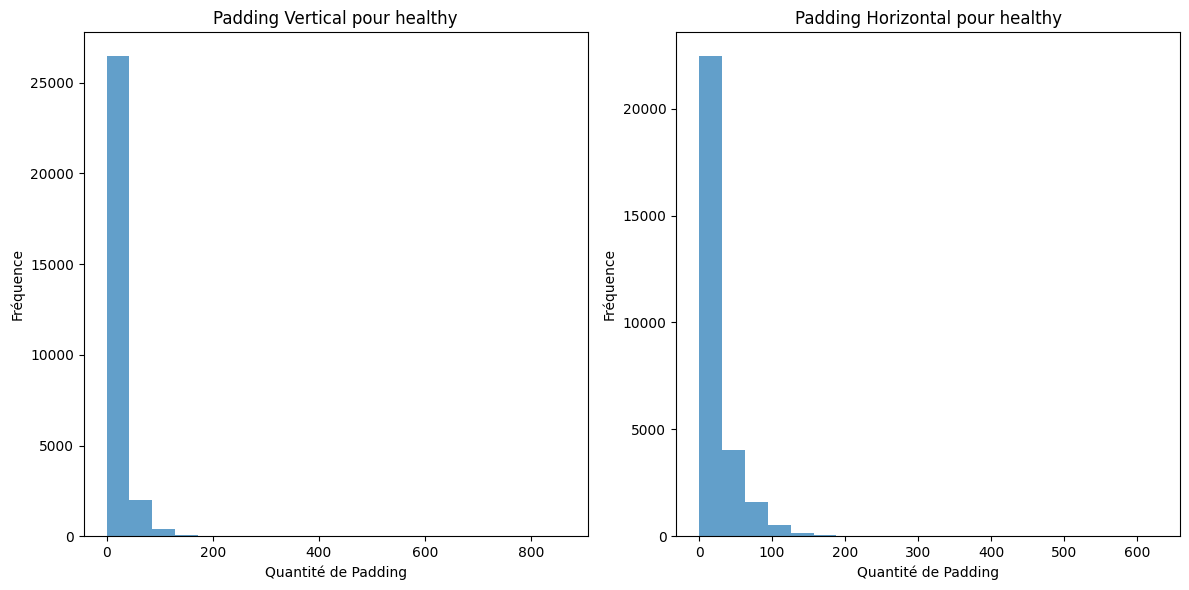

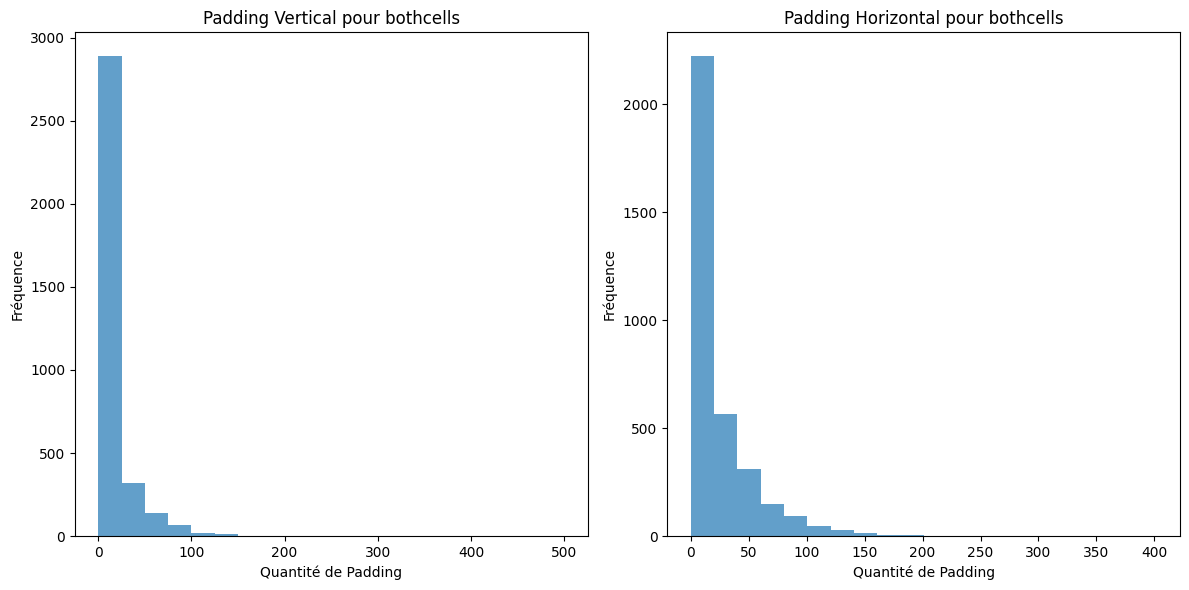

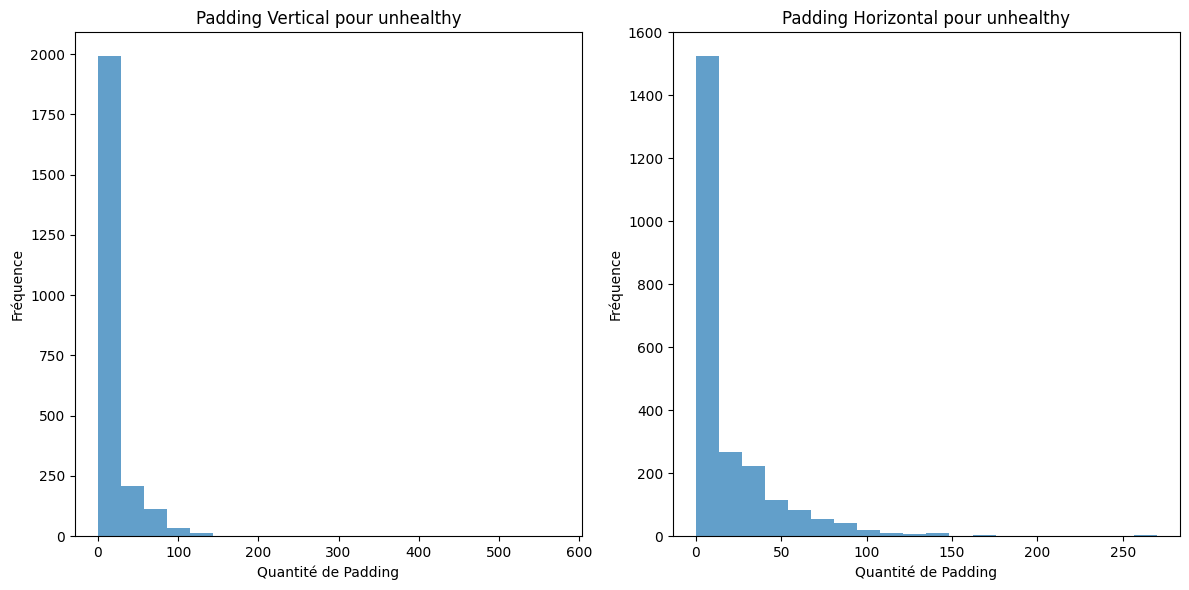

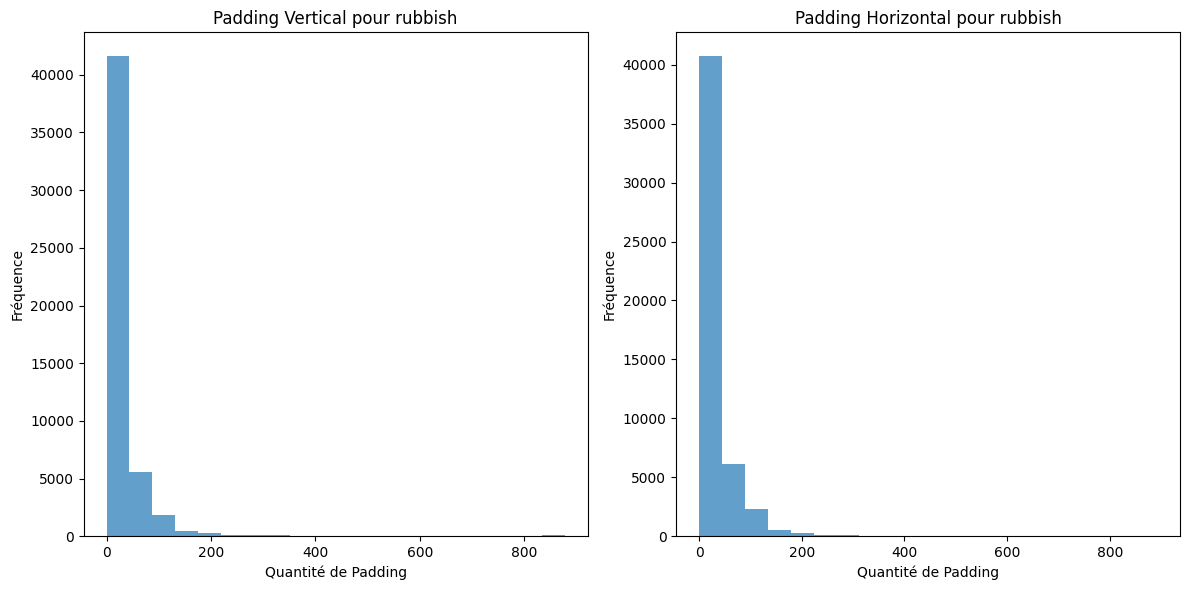

In [8]:
data_dir = '../raw_data/all/'
class_names = ['healthy', 'bothcells', 'unhealthy', 'rubbish']

create_padding_histograms(data_dir, class_names)

In [9]:
from smearly.tools.train_val_size import train_val_size

In [10]:
train_dist_percentage =[50,35,15]# [rubbish, healthy, unhealthy]
val_dist_percentage =[59,34,7]# [rubbish, healthy, unhealthy]

train_dist_float =[0.5,0.35,0.15]# [rubbish, healthy, unhealthy]
val_dist_float =[0.59,0.34,0.07]# [rubbish, healthy, unhealthy]


In [12]:
train_val_size(val_dist_percentage, train_dist_percentage)

{'train': {'bothcells': 0,
  'healthy': 18992,
  'rubbish': 27132,
  'unhealthy': 0,
  'unhealthy_bothcells': 4070,
  'unhealthy_bothcells_augmented': 4070},
 'val': {'bothcells': 0,
  'healthy': 7907,
  'rubbish': 13721,
  'unhealthy': 0,
  'unhealthy_bothcells': 1628,
  'unhealthy_bothcells_augmented': 0}}

In [13]:
train_val_size(val_dist_float, train_dist_float)

{'train': {'bothcells': 0,
  'healthy': 18992,
  'rubbish': 27132,
  'unhealthy': 0,
  'unhealthy_bothcells': 4070,
  'unhealthy_bothcells_augmented': 4070},
 'val': {'bothcells': 0,
  'healthy': 7907,
  'rubbish': 13721,
  'unhealthy': 0,
  'unhealthy_bothcells': 1628,
  'unhealthy_bothcells_augmented': 0}}